#### Features

    id: only for test & sample submission files, id for prediction sample identification
    price: price in USD
    carat: weight of the diamond
    cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    color: diamond colour, from J (worst) to D (best)
    clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    x: length in mm
    y: width in mm
    z: depth in mm
    depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
    table: width of top of diamond relative to widest point (43--95)


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diamonds_train.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [4]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,20172.000000,0.797699,61.749721,57.449421,5.730824,5.734808,3.537958,3931.902243
std,11646.742642,0.474309,1.427728,2.234087,1.121767,1.151536,0.695039,3994.318832
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,952.000000
50%,20172.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,30258.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,5317.000000
max,40344.000000,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000,18823.000000


In [6]:
df2 = df.copy()

In [7]:
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [8]:
# Sacamos lista ordenada del tipo de corte del peor al mejor
cut_list = list(df.cut.value_counts().keys())
cut_list.reverse()
cut_list

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [9]:
# Aplicamos el valor numérico para que lo valore en función de la importancia del corte
df2['cut'] = df2['cut'].apply(lambda x: cut_list.index(x))

In [10]:
# Sacamos lista ordenada del color del peor al mejor
color_list = sorted(list(df.color.value_counts().keys()),reverse=True)
color_list

['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [11]:
# Aplicamos el valor numérico para que lo valore en función de la importancia del color
df2['color'] = df2['color'].apply(lambda x: color_list.index(x))

In [12]:
# Sacamos lista ordenada de la claridad de peor a mejor
clarity_list = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_list

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [13]:
# Aplicamos el valor numérico para que lo valore en función de la importancia de la claridad
df2['clarity'] = df2['clarity'].apply(lambda x: clarity_list.index(x))

In [14]:
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,5,5,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,0,2,61.4,55.0,5.58,5.62,3.44,1276


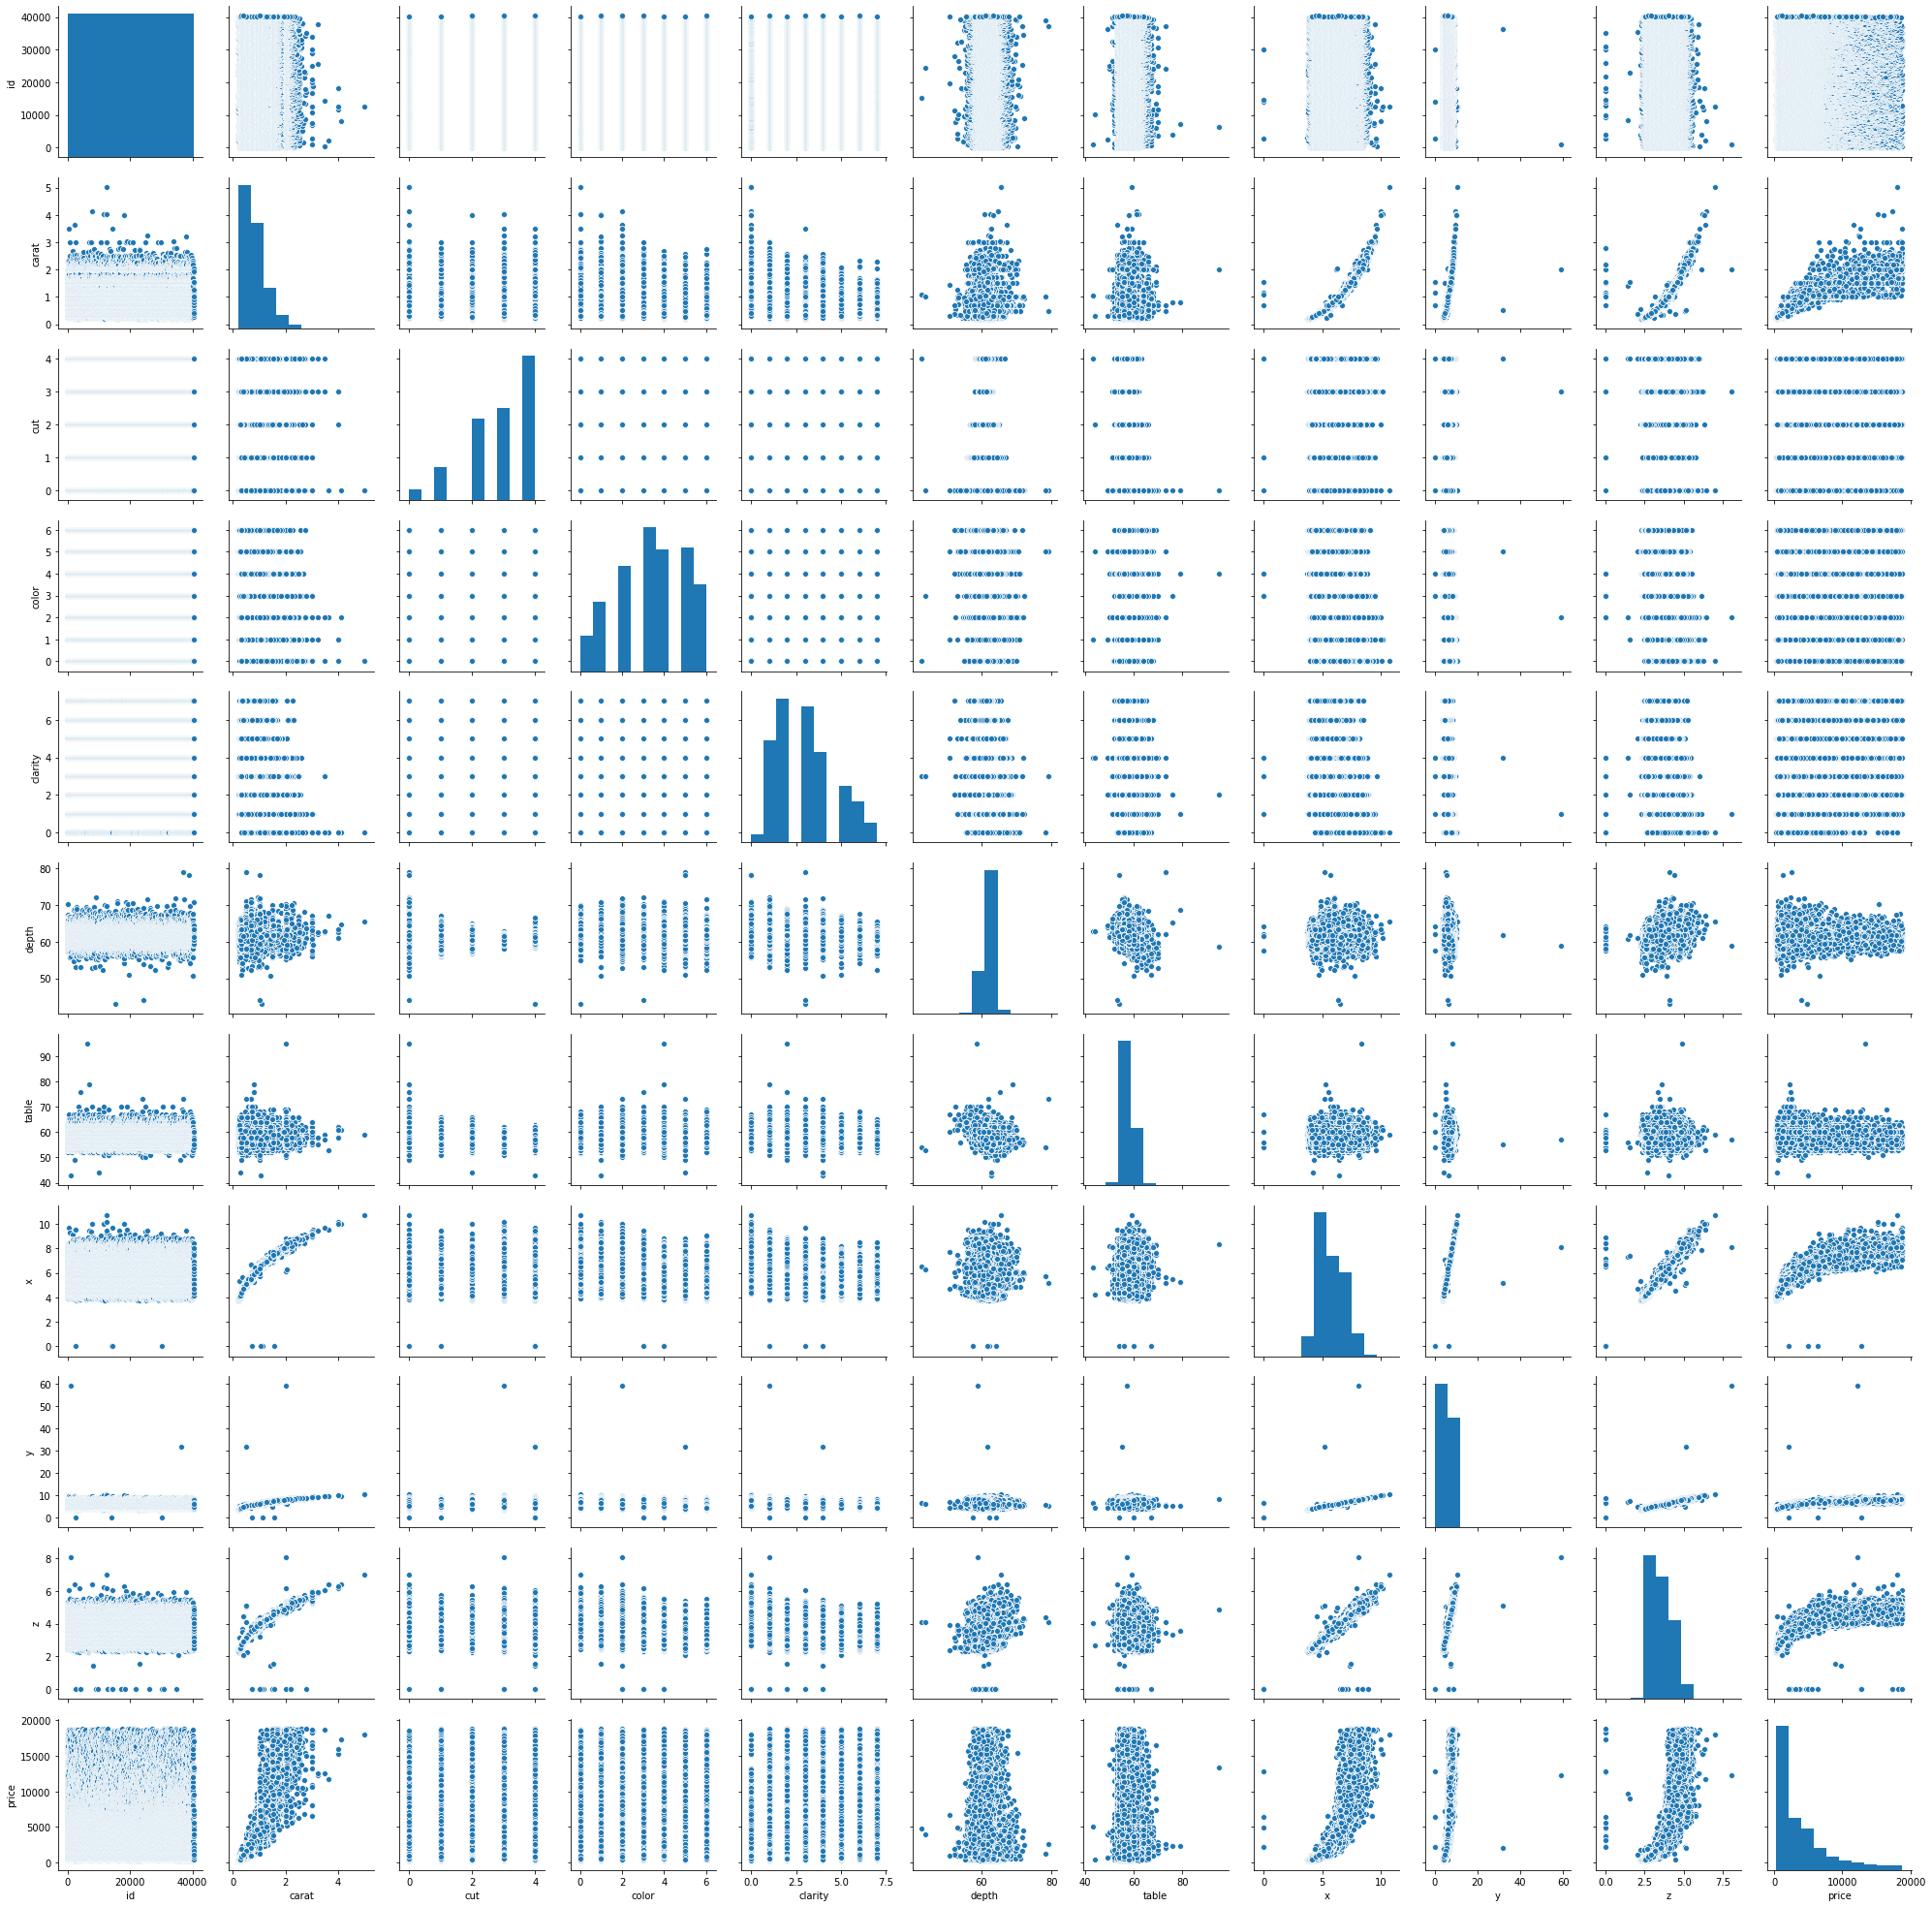

In [16]:
import seaborn as sns

sns.pairplot(df2);

In [33]:
rf_reg = RandomForestRegressor(n_estimators=250)
selector = RFECV(rf_reg, step=1, cv=5)

In [34]:
X = df2.drop(columns='price')
y = df2['price']

In [35]:
selector.fit(X, y)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=250, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [36]:
selector.n_features_

10

In [37]:
pd.Series(X.columns)[selector.support_.tolist()]

0         id
1      carat
2        cut
3      color
4    clarity
5      depth
6      table
7          x
8          y
9          z
dtype: object

In [38]:
predictors = pd.Series(X.columns)[selector.support_.tolist()].tolist()

In [39]:
X = df2[predictors]
y = df2['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
data_trained = rf_reg.fit(X_train, y_train)

In [42]:
rf_reg.feature_importances_

array([0.00301516, 0.53964556, 0.00167767, 0.03039843, 0.06217642,
       0.00269074, 0.00188955, 0.00517178, 0.34840082, 0.00493387])

In [43]:
print(data_trained.score(X_train, y_train))
print(data_trained.score(X_test, y_test))

0.9972955313873269
0.9810074780652732


In [44]:
y_test, rf_reg.predict(X_test)

(10660    3718
 25856     802
 13061     489
 7191     2022
 30565     722
          ... 
 7732     4263
 7787      583
 15726     810
 6164      523
 5218     1619
 Name: price, Length: 8069, dtype: int64,
 array([3739.196,  796.868,  523.444, ...,  681.56 ,  538.98 , 1595.312]))

In [45]:
training = data_trained.predict(X_test)

In [46]:
compare = pd.DataFrame({'Reality':y_test, 'Predicted':training})
compare

,Reality,Predicted
10660,3718,3739.196
25856,802,796.868
13061,489,523.444
7191,2022,2005.112
30565,722,774.020
...,...,...
7732,4263,3761.540
7787,583,632.608
15726,810,681.560
6164,523,538.980


In [47]:
import numpy as np
1-np.abs(y_test-training).sum()/len(y_test)

-271.47548246375015

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Cuanto de similares de media son los datos reales vs predichos
rms = sqrt(mean_squared_error(y_test, training))
rms

545.5151656351719